# Decisive Probability Distributions

In this activity, you’ll use the Alpaca API to gather pricing information for six stocks. Then, you’ll use this information to plot probability distributions for the daily returns of the stocks. Finally, you’ll determine the most and the least volatile stocks.
Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `LUV` (Southwest Airlines)

    - `DIS` (Disney) 

    - `AAPL` (Apple)

    - `SBUX` (Starbucks)

    - `ZM` (Zoom)

> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_bars` function to make the API call. Be sure to set the `df` property at the end of the `get_bars` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all six stocks.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)

## Import the required libraries and dependencies

In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline

## Step 1: Create your `.env` file at the root of your Unsolved folder. It should include your Alpaca API and secret keys. 

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
# YOUR CODE HERE

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = # YOUR CODE HERE
alpaca_secret_key = # YOUR CODE HERE

# Check the values were imported correctly by evaluating the type of each
display(# YOUR CODE HERE)
display(# YOUR CODE HERE)

str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = # YOUR CODE HERE

## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers: SPY, LUV, DIS, AAPL, SBUX, and ZM. 

* Create the list for the required `tickers`
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 

In [5]:
# Create the list for the required tickers
tickers = # YOUR CODE HERE

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = # YOUR CODE HERE
end_date = # YOUR CODE HERE


In [7]:
# Set timeframe to one day (1Day)
timeframe = # YOUR CODE HERE

In [8]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = # YOUR CODE HERE

# Review the first five rows of the resulting DataFrame 
# YOUR CODE HERE

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,210.20,215.3100,209.230,210.52,64827505,441450,212.670859,AAPL
2019-05-02 04:00:00+00:00,209.65,212.6500,208.130,209.15,32000324,233410,210.155469,AAPL
2019-05-03 04:00:00+00:00,210.78,211.8400,210.230,211.75,21092378,148449,211.161771,AAPL
2019-05-06 04:00:00+00:00,204.16,208.8400,203.500,208.48,32444375,236173,207.309513,AAPL
2019-05-07 04:00:00+00:00,205.86,207.4175,200.825,202.86,38763698,294532,203.568951,AAPL


In [9]:
# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
LUV = prices_df[prices_df['symbol']=='LUV'].drop('symbol', axis=1)
DIS = prices_df[prices_df['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = prices_df[prices_df['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = prices_df[prices_df['symbol']=='SBUX'].drop('symbol', axis=1)
ZM = prices_df[prices_df['symbol']=='ZM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, LUV, DIS, AAPL, SBUX, ZM], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "ZM"])

# Display sample data
prices_df.head()

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2019-05-01 04:00:00+00:00  294.76  294.95  291.8000  291.81   71921870   
2019-05-02 04:00:00+00:00  291.68  292.70  289.5200  291.18   65058183   
2019-05-03 04:00:00+00:00  292.80  294.34  291.2998  294.03   56579556   
2019-05-06 04:00:00+00:00  289.24  293.31  288.9000  292.82  107250892   
2019-05-07 04:00:00+00:00  290.15  290.81  285.8100  287.93  145292657   

                                                     LUV                 ...  \
                          trade_count        vwap   open   high     low  ...   
timestamp                                                                ...   
2019-05-01 04:00:00+00:00      337374  293.457138  54.60  54.61  53.855  ...   
2019-05-02 04:00:00+00:00      342564  291.101680  53.99  54.49  53.360  ...   
2019-05-03 04:00:00+00:00      249557  293.438891  53.54  53.93  53.285  ...   
2019-05-06 04:00:00+00:00      390959  291.952803  52.81  53.61  52.720  ...   
2019-05-07 04:00:00+00:00      618594  288.280747  53.04  53.12  51.450  ...   

                              SBUX                            ZM         \
                            volume trade_count       vwap   open   high   
timestamp                                                                 
2019-05-01 04:00:00+00:00  6678194       50558  77.684302  72.72  76.95   
2019-05-02 04:00:00+00:00  6247550       50730  77.272023  72.75  75.89   
2019-05-03 04:00:00+00:00  4967928       39845  78.009787  75.00  80.25   
2019-05-06 04:00:00+00:00  5607843       46777  77.731052  75.01  80.79   
2019-05-07 04:00:00+00:00  8115808       71206  78.051332  77.85  78.05   

                                                                           
                               low  close   volume trade_count       vwap  
timestamp                                                                  
2019-05-01 04:00:00+00:00  70.8159  72.76  3301900       24222  74.231378  
2019-05-02 04:00:00+00:00  69.6912  75.50  2525585       18048  72.558908  
2019-05-03 04:00:00+00:00  75.0000  79.18  2590281       20668  78.298907  
2019-05-06 04:00:00+00:00  74.5000  78.24  2051824       20419  78.125513  
2019-05-07 04:00:00+00:00  73.2500  73.33  1975220       19517  75.579497  

[5 rows x 42 columns]

## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [10]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = # YOUR CODE HERE

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
    # YOUR CODE HERE

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = # YOUR CODE HERE

# View the first and last five rows of the closing_prices_df DataFrame
display(# YOUR CODE HERE)
display(# YOUR CODE HERE)

,SPY,LUV,DIS,AAPL,SBUX,ZM
2019-05-01,291.81,53.90,136.38,210.52,77.52,72.76
2019-05-02,291.18,53.37,134.14,209.15,77.47,75.50
2019-05-03,294.03,53.62,134.33,211.75,78.05,79.18
2019-05-06,292.82,53.48,135.00,208.48,78.06,78.24
2019-05-07,287.93,52.21,133.44,202.86,77.96,73.33


,SPY,LUV,DIS,AAPL,SBUX,ZM
2020-04-27,287.05,29.11,106.06,283.17,77.74,164.60
2020-04-28,285.73,29.69,106.21,278.58,78.69,156.72
2020-04-29,293.21,30.97,112.25,287.73,76.86,146.48
2020-04-30,290.48,31.25,108.15,293.80,76.73,135.17
2020-05-01,282.79,29.23,105.50,289.07,73.79,138.56


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [11]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df = # YOUR CODE HERE

# Review the first and last five rows of the daily_returns_df DataFrame
display(# YOUR CODE HERE)
display(# YOUR CODE HERE)


,SPY,LUV,DIS,AAPL,SBUX,ZM
2019-05-02,-0.002159,-0.009833,-0.016425,-0.006508,-0.000645,0.037658
2019-05-03,0.009788,0.004684,0.001416,0.012431,0.007487,0.048742
2019-05-06,-0.004115,-0.002611,0.004988,-0.015443,0.000128,-0.011872
2019-05-07,-0.016700,-0.023747,-0.011556,-0.026957,-0.001281,-0.062756
2019-05-08,-0.001389,0.003831,0.011616,0.000197,0.001154,0.059321


,SPY,LUV,DIS,AAPL,SBUX,ZM
2020-04-27,0.014418,-0.007501,0.048127,0.000707,0.028579,0.036524
2020-04-28,-0.004599,0.019924,0.001414,-0.016209,0.012220,-0.047874
2020-04-29,0.026179,0.043112,0.056868,0.032845,-0.023256,-0.065339
2020-04-30,-0.009311,0.009041,-0.036526,0.021096,-0.001691,-0.077212
2020-05-01,-0.026473,-0.064640,-0.024503,-0.016099,-0.038316,0.025080


## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [12]:
# Using the Pandas describe function, generate summary statistics
# for each of the tickers in the daily_returns_df DataFrame
# YOUR CODE HERE

,SPY,LUV,DIS,AAPL,SBUX,ZM
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.000074,-0.001992,-0.000684,0.001582,0.000161,0.003493
std,0.019849,0.028897,0.025728,0.025633,0.026721,0.043875
min,-0.109424,-0.151094,-0.129846,-0.128647,-0.162042,-0.152795
25%,-0.004377,-0.009047,-0.009820,-0.007907,-0.010148,-0.017709
50%,0.000599,-0.000193,0.000099,0.000707,0.000713,0.000965
75%,0.006779,0.009041,0.008487,0.013432,0.009672,0.021675
max,0.090603,0.144441,0.144123,0.119808,0.147303,0.222214


## Step 8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

<AxesSubplot:title={'center':'Daily Returns Histogram'}, ylabel='Frequency'>

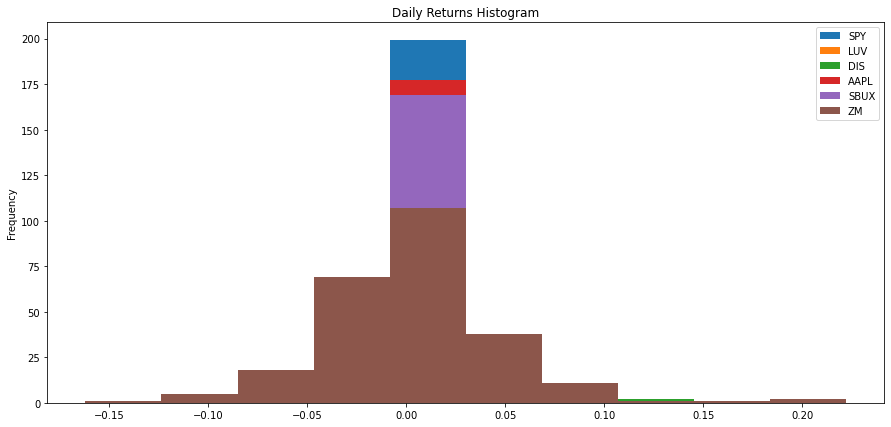

In [13]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Give the plot a title and adjust the figure size
# YOUR CODE HERE

<AxesSubplot:title={'center':'Daily Returns Density Plot'}, ylabel='Density'>

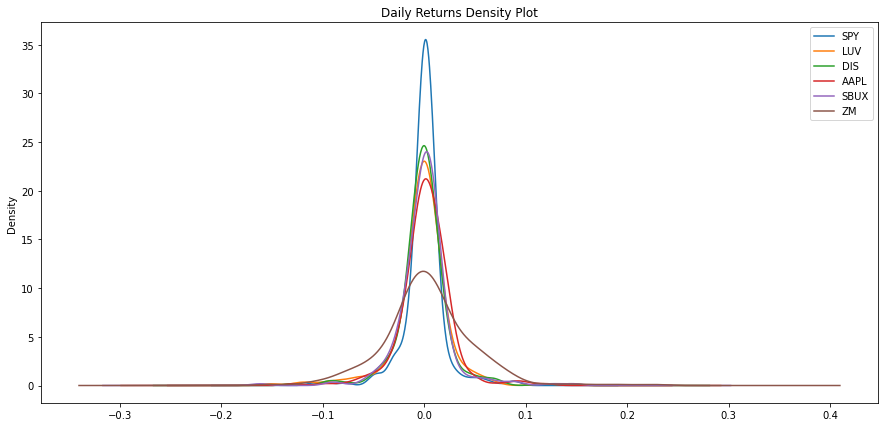

In [14]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size
# YOUR CODE HERE

## Reflect on the following question:

**Question:** After analyzing the summary statistics, histogram, and density plot for the SPY, LUV, DIS, AAPL, SBUX, and ZM stocks, which do you think is the most volatile stock based on the daily return data? Which is the least volatile?
    
**Answer:** # YOUR ANSWER HERE